In [1]:
import numpy as NP;
import scipy.linalg as LA;
import matplotlib.pyplot as plt


In [2]:
##  @brief      This function computes the eigenvalues of the
#               Jacobian matrix associated with the the standard
#               Schnakenberg system, with no time delay, evaluated
#               at its unique fixed point.
#   @param  a   This must be a value of type double, is >0 and dictates the
#               value of the a coefficient in the Schnakenberg governing
#               equations, whose Jacobian eigenvalues we wish to compute.
#   @param  b   This must be a value of type double, is >0 and dictates the
#               value of the a coefficient in the Schnakenberg governing
#               equations, whose Jacobian eigenvalues we wish to compute.
#   @return     This function returns a one dimensional array of length 2,
#               of type complex number. The values returned by this matrix
#               correspond to the eigenvalues associated with the Jacobian
#               for this system, evaluated at the fixed point.
def computeEigenvalues(a,b):
    u_fixed = b+a;
    v_fixed = b/((b+a)**2);
    jacobian = lambda u,v: NP.array([[-1+2*u*v, u**2],[-2*u*v, -u**2]]);
    fixed_point_matrix = jacobian(u_fixed, v_fixed);
    eigenvalues, eigenvectors = LA.eig(fixed_point_matrix);
    return eigenvalues;


In [3]:
# Generate a list of a and b values that will be used to produce a bifurcation
# plot.    
a_amt = 50;
a_values = NP.linspace(0.001, 3, num=a_amt);
b_amt=50;
b_values = NP.linspace(0.001, 3, num=b_amt);


In [4]:
# The matrix that will be used to store the type of fixed point that our
# system contains for each combination of a and b values.
fixed_point_types = NP.zeros((a_amt,b_amt));

In [5]:
# The numeric values that will be assigned for each type of fixed point.
source_colour_value = 5;
sink_colour_value = 3;
saddle_colour_value = 10;
unstable_spiral_colour_value = -5;
stable_spiral_colour_value = -3;


In [6]:
# Iterate through each combination of a and b values in the a_values and
# b_values lists and classify the fixed point in each system.
for i in range(0, a_amt):
    for j in range(0, b_amt):
        a = a_values[i];
        b = b_values[j];

        eigenvalues = computeEigenvalues(a, b);

        real1 = NP.real(eigenvalues[0]);
        real2 = NP.real(eigenvalues[1]);
        imag1 = NP.imag(eigenvalues[0]);
        imag2 = NP.imag(eigenvalues[1]);
        
        # If the fixed point is asymptotically unstable.        
        if(real1>0 and real2>0):
            if(abs(imag1)<1e-16):
                fixed_point_types[i][j] = source_colour_value;
            else:
                fixed_point_types[i][j] = unstable_spiral_colour_value;

        # If fixed point is a hyperbolic saddle.
        elif((real1>0 and real2<0) or (real1<0 and real2>0)):
                fixed_point_types[i][j] = saddle_colour_value;

        # If the fixed point is asymptotically stable.
        elif(real1<0 and real2<0):
            if(abs(imag1)<1e-16):
                fixed_point_types[i][j] = sink_colour_value;
            else:
                fixed_point_types[i][j] = stable_spiral_colour_value;


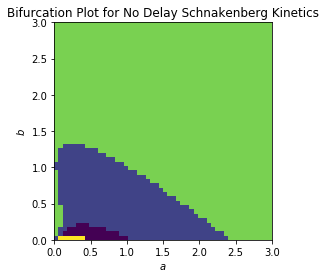

In [7]:
# Plot types of fixed point in a bifurcatiion diagram.
XX, YY = NP.meshgrid(a_values, b_values);
fig = plt.figure();
plt.title('Bifurcation Plot for No Delay Schnakenberg Kinetics');
p = plt.imshow(fixed_point_types, extent=[0, max(a_values), max(b_values), 0]);
plt.xlabel('$a$');
plt.ylabel('$b$');
plt.gca().invert_yaxis()
plt.show();